In [1]:
# run in one batch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# scipy imports
import scipy.stats as stats

# sklearn imports
from sklearn.linear_model import LinearRegression

In [2]:
# load data
snow_df = pd.read_csv('snotel-data/snotel_380_butte.csv',header=58) 

# load data
snow_df = pd.read_csv('snotel-data/snotel_680_park_cone.csv',header=58) 

In [3]:
snow_df.columns = ['date', 'swe_start_in',
       'precip_start_in',
       'airtemp_max_F', 'airtemp_min_F',
       'airtemp_mean_F', 'precip_incr_in']

# datetime operations
snow_df['dt'] = pd.to_datetime(snow_df['date'])
snow_df['year'] = snow_df['dt'].dt.year

# remove rows with swe=0
snow_df.drop(snow_df[snow_df.swe_start_in == 0].index, inplace=True)

# annual peak swe
peak_swe = snow_df.groupby(snow_df.year)['swe_start_in'].max()

# annual sum swe
sum_swe = snow_df.groupby(snow_df.year)['swe_start_in'].cumsum()

# Q data
q_df = pd.read_csv('q-data/gunnison_delta.csv',sep='\t',header=32)

q_df.columns = ['USGS', 'id', 'dt_string', 'tz', 'cfs', 'junk']

# datetime operations
q_df['dt'] = pd.to_datetime(q_df['dt_string'])
q_df['year'] = q_df['dt'].dt.year
q_df['month'] = q_df['dt'].dt.month
q_df['day'] = q_df['dt'].dt.day

# new datetime without time
q_df['timestamp'] = pd.to_datetime(q_df[['year','month', 'day']], errors='coerce')

# make series from groupby, this has timestamp as index
daily_q = q_df.groupby(['timestamp'])['cfs'].mean()

# make df from series
daily_q_df = pd.DataFrame(daily_q)

# annual peak Q
peak_q = q_df.groupby(q_df.year)['cfs'].max()

# cumulative Q
sum_q = q_df.groupby(q_df.year)['cfs'].cumsum()

#set snow df index to dt
snow_df.set_index(snow_df.dt, inplace=True)

# merge datasets
data = pd.merge(snow_df, daily_q_df, how='left', left_index=True, right_index=True)

R2 = 0.165


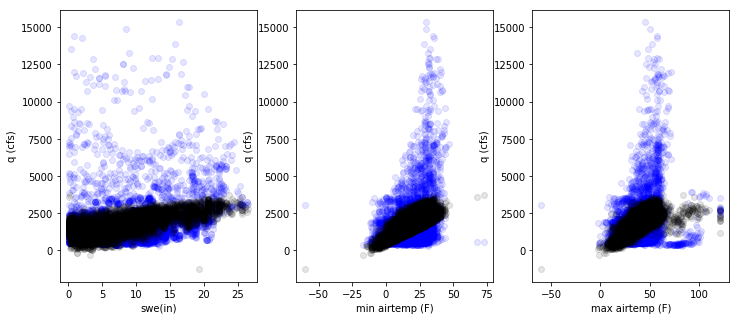

In [4]:
# remove nan rows
data_clean = data.dropna()

# regression
X = data_clean[['swe_start_in','airtemp_min_F','airtemp_max_F']]
y = data_clean['cfs']

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)

# R2 score
score = model.score(X,y)
print('R2 = {0:.3f}'.format(score))

# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,3,figsize=(12,5));
ax[0].plot(data_clean.swe_start_in,y,'bo',alpha=0.1)
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean.swe_start_in,y_hat,'ko',alpha=0.1)

ax[1].plot(data_clean.airtemp_min_F,y,'bo',alpha=0.1)
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean.airtemp_min_F,y_hat,'ko',alpha=0.1)

ax[2].plot(data_clean.airtemp_max_F,y,'bo',alpha=0.1)
ax[2].set_ylabel('q (cfs)');
ax[2].set_xlabel('max airtemp (F)')
ax[2].plot(data_clean.airtemp_max_F,y_hat,'ko',alpha=0.1)

In [5]:
# clean outliers (drop rows)
df = data_clean
# clear min airtemp outliers
df.drop(df[df.airtemp_min_F > 65].index, inplace=True)
df.drop(df[df.airtemp_min_F < -40].index, inplace=True)
# clear max airtemp outliers
df.drop(df[df.airtemp_max_F > 120].index, inplace=True)
df.drop(df[df.airtemp_max_F < -50].index, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying 

R2 = 0.166


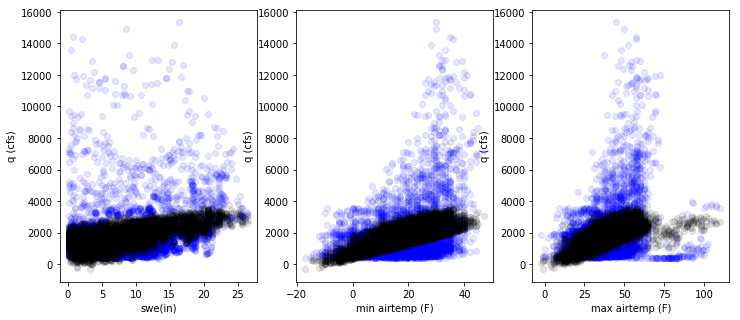

In [6]:
data_clean = df

# regression again
X = data_clean[['swe_start_in','airtemp_min_F','airtemp_max_F']]
y = data_clean['cfs']

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)

# R2 score
score = model.score(X,y)
print('R2 = {0:.3f}'.format(score))


# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,3,figsize=(12,5));
ax[0].plot(data_clean.swe_start_in,y,'bo',alpha=0.1)
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean.swe_start_in,y_hat,'ko',alpha=0.1)

ax[1].plot(data_clean.airtemp_min_F,y,'bo',alpha=0.1)
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean.airtemp_min_F,y_hat,'ko',alpha=0.1)

ax[2].plot(data_clean.airtemp_max_F,y,'bo',alpha=0.1)
ax[2].set_ylabel('q (cfs)');
ax[2].set_xlabel('max airtemp (F)')
ax[2].plot(data_clean.airtemp_max_F,y_hat,'ko',alpha=0.1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


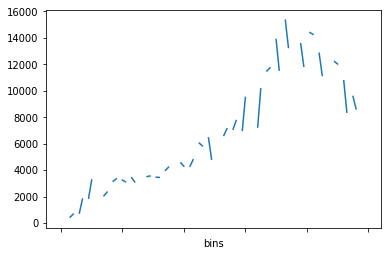

In [7]:
# binned regression
# max q per temperature

bins = 100
bins, binvals = pd.cut(data_clean.airtemp_min_F,bins,right=True,retbins=True)
data_clean['bins'] = bins.values
maxQ_mintemp = data_clean.groupby(data_clean.bins)['cfs'].max()
maxQ_mintemp.plot()

In [8]:
# data for new regression
meanSWE_mintemp = data_clean.groupby(data_clean.bins)['swe_start_in'].mean()
meanAIR_mintemp = data_clean.groupby(data_clean.bins)['airtemp_min_F'].mean()
data_binned = pd.concat([meanSWE_mintemp,meanAIR_mintemp,maxQ_mintemp], axis=1)

data_clean2 = data_binned.dropna()

cols = data_clean2.columns
# regression again
X = data_clean2[cols[:2]]
y = data_clean2[cols[-1]]

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)



R2 = 0.802


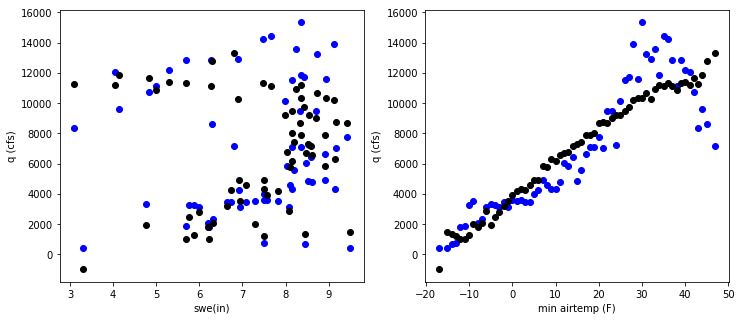

In [9]:
# R2 score
score = model.score(X,y)
print('R2 = {0:.3f}'.format(score))

# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,2,figsize=(12,5));
ax[0].plot(data_clean2.swe_start_in,y,'bo')
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean2.swe_start_in,y_hat,'ko')

ax[1].plot(data_clean2.airtemp_min_F,y,'bo')
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean2.airtemp_min_F,y_hat,'ko')

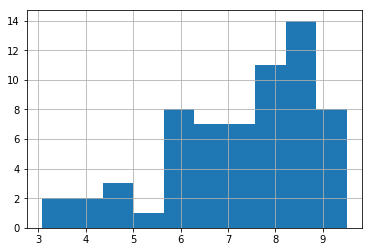

In [10]:
data_clean2.swe_start_in.hist()

In [11]:
# how many zeros?
ones = data_clean2.swe_start_in.values.astype(bool).sum(axis=0)
zeros = len(data_clean2.swe_start_in) - ones
print(zeros)
print(zeros/len(data_clean2.swe_start_in))

0
0.0


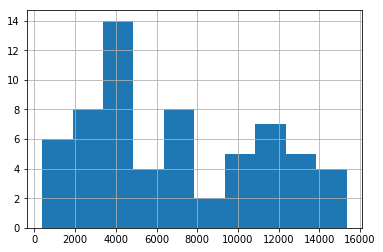

In [12]:
y.hist()

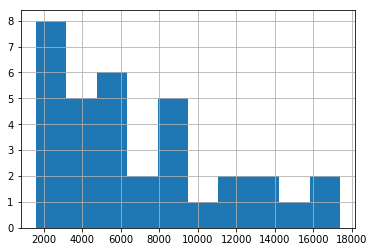

In [13]:
peak_q.hist()